**Name:** Alexia Ntantouri

**AEM:** 3871

**IMPORTANT NOTE:**

It is recommended to read this notebook along with the PDF report that presents the results in a comprehensive manner.

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from timeit import default_timer as timer

from keras.datasets import cifar10

import matplotlib.pyplot as plt

c:\Users\alexi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the values
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train_not_reshaped, X_test_not_reshaped = X_train, X_test

print("X_train dimensions: " + str(X_train.shape))
print("y_train dimensions: " + str(y_train.shape) + "\n")

print("X_test dimensions: " + str(X_test.shape))
print("y_test dimensions: " + str(y_test.shape))

X_train dimensions: (50000, 32, 32, 3)
y_train dimensions: (50000, 1)

X_test dimensions: (10000, 32, 32, 3)
y_test dimensions: (10000, 1)


In [3]:
# classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Classes: ", str(len(classes)), "\n")

for i in range(len(classes)):
  print(classes[i])

Classes:  10 

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


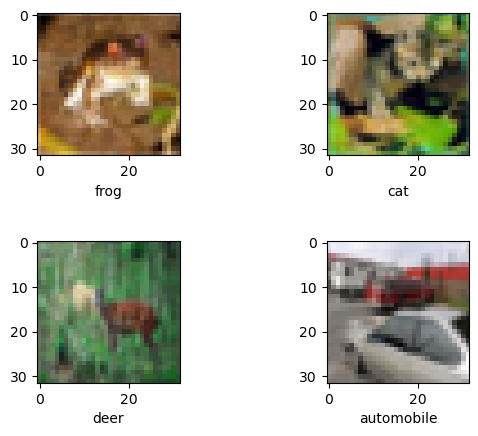

In [4]:
# image samples

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[0][0]])

plt.subplot(2,2,2)
plt.imshow(X_train[10254], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[10254][0]])

plt.subplot(2,2,3)
plt.imshow(X_train[20253], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[20253][0]])

plt.subplot(2,2,4)
plt.imshow(X_train[49999], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[49999][0]])

plt.show()

In [5]:
# reshape the data

# reshape the 4D array into a 2D array
# the first dimension (number of samples) should remain the same (50000)
# the -1 in the second dimension indicates that NumPy should automatically calculate
# the size of that dimension based on the total number of elements, maintaining the integrity of the data.
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape) + "\n")

X_train dimensions: (50000, 3072)
X_test dimensions: (10000, 3072)



# **PCA**

I used sklearn's **PCA** to hold **90%** of the variance of the data and the dimensionality of the dataset decreased from **3071** to **99** features (**-96.7773%** decrease).

In [6]:
from sklearn.decomposition import PCA

start = timer()

# PCA will hold 90% of the variance
pca = PCA(0.9)
pca.fit(X_train)

end = timer()
print("Time: ", end - start) # time in seconds

# PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
#   svd_solver='auto', tol=0.0, whiten=False)

print(pca.n_components_)

Time:  61.8267185
99


**pca.explained_variance_ratio_** contains the ratio of variance explained by each principal component.

**np.cumsum()** calculates the cumulative sum of these explained variances.

Text(0, 0.5, 'cumulative explained variance')

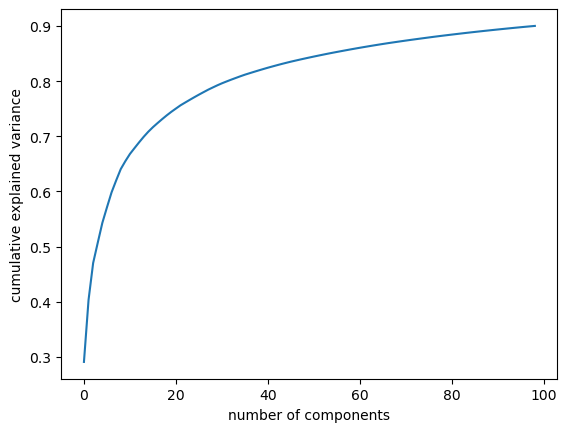

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

In [9]:
print(train_pca.shape)
print(test_pca.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 99)
(10000, 99)
(50000, 1)
(10000, 1)


In [10]:
def print_accuracy(model, test_set, y_set):
  start = timer()

  y_pred = model.predict(test_set)
  accuracy = accuracy_score(y_set, y_pred)

  end = timer()

  print("accuracy:", accuracy)
  print("Prediction time: ", end - start) # time in seconds

  # print(classification_report(y_set, y_pred))


# **SVMs**

Support Vector Machines (SVMs) are a type of supervised machine learning algorithm that can be used for classification and regression tasks. SVMs are particularly well-suited for classification problems and are effective in high-dimensional spaces, making them popular in various applications such as image recognition.

**Objective:**

The primary objective of an SVM is to find a hyperplane that best separates the data into different classes. A hyperplane is a decision boundary that maximizes the margin between the classes.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin because a larger margin often results in a more robust and generalized model.

**Support Vectors:**

Support vectors are the data points that lie closest to the decision boundary (the hyperplane). These are the critical points that determine the position and orientation of the hyperplane.

**Kernel Trick:**

SVMs can handle non-linear relationships in the data by using what is known as the "kernel trick." Kernels are functions that transform the input data into a higher-dimensional space, allowing for the creation of non-linear decision boundaries. Common kernel functions include the linear kernel, polynomial kernel, and radial basis function (RBF) kernel.

# **1. Testing different kernel functions**

In this section, we experiment with different kernel functions. The **results** show that the **RBF** kernel is the best, meaning it has the **fastest training** time (405 seconds) and achieves the **highest accuracy** both for the training (65.472%) and the test set (54.01%).

*(Please read the PDF report that shows the table with the times and the accuracy measurements)*

**Linear Kernel**

The linear kernel is the simplest form of kernel and is used for linearly separable data. It represents the dot product of the input vectors. The decision boundary is a straight line in the original feature space.

In [13]:
svm = SVC(kernel='linear', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  1694.9664016999886


In [14]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.42024
Prediction time:  199.7730506999942
Test accuracy: 0.4077
Prediction time:  42.33911690002424


**Polynomial Kernel**

The polynomial kernel introduces non-linearity by computing the polynomial expansion of the features. It has a parameter that controls the degree of the polynomial.

In [11]:
svm = SVC(kernel='poly', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  570.0943791999889


In [12]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.63514
Prediction time:  229.78985140001168
Test accuracy: 0.4647
Prediction time:  40.956619699980365


**Sigmoid Kernel**

The sigmoid kernel is a non-linear kernel that is based on the hyperbolic tangent function.

In [11]:
svm = SVC(kernel='sigmoid', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  466.34969332000037


In [12]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.22366
Prediction time:  422.73546030299985
Test accuracy: 0.2235
Prediction time:  84.53062336100083


**RBF Kernel**

The RBF (Radial Basis Function) kernel is commonly used and is effective for non-linear data. It transforms the data into an infinite-dimensional space.

In [ ]:
svm = SVC(kernel='rbf', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  405.1394417399997


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.65472
Prediction time:  394.80770216699966
Test accuracy: 0.5401
Prediction time:  78.04516349400001


# **2. Testing different degrees for the polynomial kernel**

In this section, we experiment with different degree values for the polynomial kernel. The polynomial kernel introduces non-linearity by computing the polynomial expansion of the input features. A higher degree allows the model to capture more complex relationships in the data. However, a very high degree can lead to overfitting, while a lower degree may not capture the non-linear relationships between the input data.

The **results** show that by having **degree=2**, we achieve the **highest test accuracy** (46.47%), while by having **degree=3**, we achieve the **highest train accuracy** (63.514%) but a little lower test accuracy (46.47% in comparison to 54.44% train accuracy for degree=2).

## Degree = 1

In [11]:
svm = SVC(kernel='poly', degree=1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  462.55633370002033


In [12]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.4181
Prediction time:  190.63944379999884
Test accuracy: 0.4111
Prediction time:  38.10291299998062


## Degree = 2

In [13]:
svm = SVC(kernel='poly', degree=2, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  438.24111370000173


In [14]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.54444
Prediction time:  176.3182022999972
Test accuracy: 0.4731
Prediction time:  37.40389330001199


## Degree = 3

In [15]:
svm = SVC(kernel='poly', degree=3, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  568.2312898000237


In [16]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train 

accuracy: 0.63514
Prediction time:  193.1546617000131
Test accuracy: 0.4647
Prediction time:  42.78199180000229


## Degree = 4

In [17]:
svm = SVC(kernel='poly', degree=4, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  702.0123454999994


In [18]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.60616
Prediction time:  213.99115940000047
Test accuracy: 0.3919
Prediction time:  45.27969719999237


# **3. Testing different C values**

From the sklearn docs:

*The **C parameter** trades off **correct classification of training examples** against maximization of the **decision function's margin**.*

*For **larger values of C**, a **smaller margin** will be accepted if the **decision function** is **better** at classifying all training points correctly.*

*A **lower C** will encourage a **larger margin**, therefore a **simpler decision function**, at the cost of training accuracy.*

*In other words C behaves as a **regularization parameter** in the SVM.*

## For the RBF kernel

We experiment with different C parameter values using the RBF kernel, since we concluded above, that it is the fastest and the most accurate.

The **results** show that having **C=10** gives us the **highest accuracy** both for the training (92.16%) and the test set (56.23%).

### C = 0.01

In [ ]:
svm = SVC(kernel='rbf', C=0.01, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  645.6414679190002


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.35946
Prediction time:  466.520425187
Test accuracy: 0.3644
Prediction time:  91.93839395100076


### C = 0.1

In [ ]:
svm = SVC(kernel='rbf', C=0.1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  412.113401184999


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.47696
Prediction time:  414.7044084530007
Test accuracy: 0.4605
Prediction time:  84.65675554399968


### C = 1.0

In [ ]:
svm = SVC(kernel='rbf', C=1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  366.0281707310005


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.65472
Prediction time:  409.2872987129995
Test accuracy: 0.5401
Prediction time:  77.05279047699969


### C = 2.0

In [ ]:
svm = SVC(kernel='rbf', C=2, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  361.5568314410002


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.73614
Prediction time:  395.8783365680001
Test accuracy: 0.5536
Prediction time:  78.06743396399997


### C = 10.0

In [ ]:
svm = SVC(kernel='rbf', C=10, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  458.855694287


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.9216
Prediction time:  384.41269273999933
Test accuracy: 0.5623
Prediction time:  76.46059308900112


### C = 20.0

In [19]:
svm = SVC(kernel='rbf', C=20, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  567.7786965999985


In [20]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.96436
Prediction time:  360.9753130999743
Test accuracy: 0.5555
Prediction time:  76.38610100001097


### C = 50.0

In [ ]:
svm = SVC(kernel='rbf', C=50, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  668.8847814389992


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.98974
Prediction time:  406.9494022059989
Test accuracy: 0.5498
Prediction time:  82.43622448799943


# **4. Testing different gamma parameters**

**Gamma** is a kernel **coefficient** for **RBF**, **polynomial** and **sigmoid** kernels.

## For the RBF kernel

We experiment with different gamma parameter values using the RBF kernel, since we concluded above, that it is the fastest and most accurate.

**Small gamma:**

A smaller gamma leads to a broader Gaussian kernel.
The influence of a single training example extends over a larger region.
The decision boundary becomes smoother, and the model tends to generalize more.

**Large gamma:**

A larger gamma results in a narrower Gaussian kernel.
The influence of a single training example is localized to a smaller region.
The decision boundary becomes more complex, and the model may become more prone to overfitting.

Choosing an appropriate gamma value is crucial for the performance of the SVM. A too small gamma value can lead to an overly simplistic model, while a too large gamma value can lead to a model that is too complex and may overfit the training data.

The **results** show that having **gamma='auto'** gives the highest accuracy for the test set (55.23%), while **gamma=0.02** gives the second highest test accuracy (54.72%) and better training accuracy (89.596%) than the one with gamma='auto' (75.644%).

### For gamma = 'scale'

From the sklearn docs:

*if **gamma='scale'** (default) is passed then it uses 1 / (n_features * X.var()) **bold text** as value of gamma*

This means that the **gamma value** is calculated based on the **inverse** of the **number of features** and the **variance of the data**.

In [15]:
svm = SVC(kernel='rbf', gamma='scale', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  445.7337806999858


In [16]:
print("Actual gamma value:", svm._gamma)

Actual gamma value: 0.005833568570065396


In [17]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.65472
Prediction time:  472.64700550001
Test accuracy: 0.5401
Prediction time:  97.90050009998959


### For gamma = 'auto'

If gamma='auto', it uses 1 / n_features

In [18]:
svm = SVC(kernel='rbf', gamma='auto', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  459.74430560000474


In [19]:
print("Actual gamma value:", svm._gamma)

Actual gamma value: 0.010101010101010102


In [20]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.75644
Prediction time:  474.28898610000033
Test accuracy: 0.5523
Prediction time:  112.31296219999786


### For gamma = 0.02

In [21]:
svm = SVC(kernel='rbf', gamma=0.02, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  754.6189650000015


In [22]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.89596
Prediction time:  399.6631464000093
Test accuracy: 0.5472
Prediction time:  76.28889429999981


### For gamma = 0.1

In [23]:
svm = SVC(kernel='rbf', gamma=0.1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  1774.655765100004


In [24]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.99842
Prediction time:  428.0459464000014
Test accuracy: 0.2694
Prediction time:  83.93380500000785


# **5. Testing different coef0 parameters**

The **coef0** parameter controls how much the model is **influenced** by **high-degree polynomials** compared to **lower-degree ones**. It is an independent term in kernel function and it is only significant in 'poly' and 'sigmoid'.

## For the polynomial kernel

We experiment with different coef0 parameter values using the polynomial kernel, since we concluded above, that it is faster and more accurate than the sigmoid kernel.

The **results** show that **coef0=2.0** achieves the highest accuracy both for the training (80.234%) and the test set (54.96%).

### For coef0 = 0.0

In [ ]:
svm = SVC(kernel='poly', C=1, degree=3, gamma='scale', random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  614.8330076539996


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.63514
Prediction time:  250.64392213799874
Test accuracy: 0.4647
Prediction time:  49.70423670499986


### For coef0 = 1.0

In [ ]:
svm = SVC(kernel='poly', C=1, degree=3, gamma='scale', coef0=1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  417.957406169


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.77496
Prediction time:  248.43881584700102
Test accuracy: 0.549
Prediction time:  47.304304676001266


### For coef0 = -1.0

In [ ]:
svm = SVC(kernel='poly', C=1, degree=3, gamma='scale', coef0=-1, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  341.84910749400115


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.16496
Prediction time:  259.90725679800016
Test accuracy: 0.1626
Prediction time:  64.87810096499925


### For coef0 = 2.0

In [ ]:
svm = SVC(kernel='poly', C=1, degree=3, gamma='scale', coef0=2, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  515.3121866780002


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.80234
Prediction time:  256.2826593269983
Test accuracy: 0.5496
Prediction time:  51.41547840699968


### For coef0 = 5.0

In [ ]:
svm = SVC(kernel='poly', C=1, degree=3, gamma='scale', coef0=5, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  1005.0063786160008


In [ ]:
print("Train", end=" ")
print_accuracy(svm, train_pca, y_train)

print("Test", end=" ")
print_accuracy(svm, test_pca, y_test)

Train accuracy: 0.84216
Prediction time:  228.77644770799998
Test accuracy: 0.5414
Prediction time:  46.46325056599926


# **6. Randomized Search**

I used sklearn's RandomizedSearchCV to find the best hyperparameters for the model.

From the sklearn docs:

*In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.*

In [21]:
from sklearn.model_selection import RandomizedSearchCV

svm = SVC()

parameter_grid = {
    'C': [0.1, 1, 2, 10, 50, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 1.0, 2.0]
}

grid_search = RandomizedSearchCV(svm, parameter_grid, random_state=2, n_iter=5, cv=5, n_jobs=-1)

start = timer()

grid_search.fit(train_pca, y_train.ravel())

end = timer()
print("Time: ", end - start) # time in seconds

print("Best params:")
print(grid_search.best_params_)

Time:  6691.690588199999
Best params:
{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 2.0, 'C': 1}


In [22]:
print("Train", end=" ")
print_accuracy(grid_search, train_pca, y_train)

print("Test", end=" ")
print_accuracy(grid_search, test_pca, y_test)

Train accuracy: 0.80234
Prediction time:  168.0660310999956
Test accuracy: 0.5496
Prediction time:  33.691915700008394


# **7. Voting Ensemble**

A voting ensemble is a technique that combines the predictions of multiple individual models to improve overall predictive performance. The idea behind a voting ensemble is to leverage the diversity of different models to achieve better generalization and accuracy than any single model on its own.

## Hard Voting

In hard voting, each individual model in the ensemble "votes" for a class label, and the class label that receives the majority of votes is selected as the final prediction.
This approach is effective when individual models have similar accuracies, and combining their decisions can lead to a more robust and accurate prediction.


In [ ]:
from sklearn.ensemble import VotingClassifier

start = timer()

clf1 = SVC(kernel='rbf', gamma='auto', C=2, random_state=42)
clf2 = SVC(kernel='rbf', gamma='scale', C=10, random_state=42)
clf3 = SVC(kernel='rbf', gamma='scale', C=2, random_state=42)

eclf1 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='hard', n_jobs=-1)

eclf1 = eclf1.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  983.1699396149997


In [ ]:
y_pred = eclf1.predict(train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy)

y_pred = eclf1.predict(test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Train accuracy: 0.89246
Test accuracy: 0.5602


## Soft Voting

In soft voting, each individual model provides a probability distribution over the classes, and these probabilities are averaged or aggregated. The class with the highest average probability becomes the final prediction.
Soft voting is often more suitable when individual models provide confidence scores or probabilities rather than discrete class labels.

In [ ]:
from sklearn.ensemble import VotingClassifier

start = timer()

clf1 = SVC(kernel='rbf', gamma='auto', C=2, probability=True, random_state=42)
clf2 = SVC(kernel='rbf', gamma='scale', C=10, probability=True, random_state=42)
clf3 = SVC(kernel='rbf', gamma='scale', C=2, probability=True, random_state=42)

eclf1 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='soft', n_jobs=-1)

eclf1 = eclf1.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in secondsfrom sklearn.ensemble import VotingClassifier

Training time:  5053.362931926997


In [ ]:
y_pred = eclf1.predict(train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy)

y_pred = eclf1.predict(test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Train accuracy: 0.90184
Test accuracy: 0.5695


# **8. The best SVM**

The best SVM we managed to get in terms of test accuracy is an SVM with an **RBF** kernel, **gamma='auto'** and **C=2**, which achieves **86.304%** train accuracy and **56.36%** test accuracy.

In [ ]:
# the best svm

svm = SVC(kernel='rbf', gamma='auto', C=2, random_state=42)

start = timer()

svm.fit(train_pca, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  336.76978679200005


In [ ]:
y_pred = svm.predict(train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy)

y_pred = svm.predict(test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Train accuracy: 0.86304
Test accuracy: 0.5636


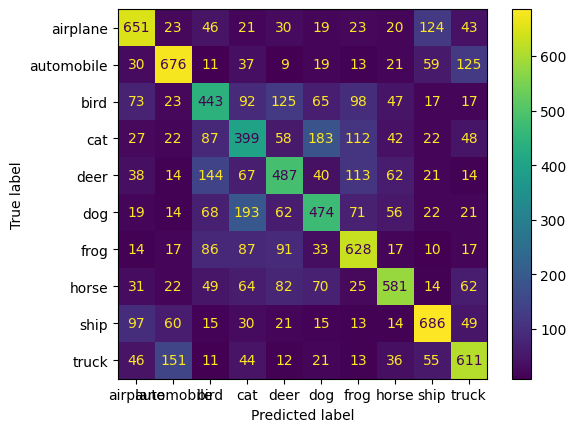

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

## **Examples of correctly and wrongly classified images**

For the number  1  sample:
The correct class was:  cat  and it was correctly classified as:  cat


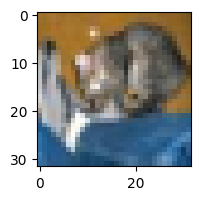

In [ ]:
# examples of correctly and wrongly classified images

for i in range(len(y_pred)):
  if y_pred[i]==y_test[i][0]:
    print("For the number ", i+1, " sample:")
    print("The correct class was: ", classes[y_test[i][0]], " and it was correctly classified as: ", classes[y_pred[i]])
    break

plt.figure(figsize=(2, 2))
plt.imshow(X_test_not_reshaped[i], cmap=plt.get_cmap('CMRmap'))
plt.show()

For the number  5  sample:
The correct class was:  frog  and it was wrongly classified as:  deer


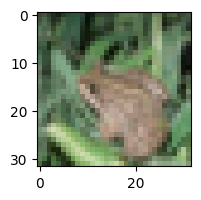

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]!=y_test[i][0]:
    print("For the number ", i+1, " sample:")
    print("The correct class was: ", classes[y_test[i][0]], " and it was wrongly classified as: ", classes[y_pred[i]])
    break

plt.figure(figsize=(2, 2))
plt.imshow(X_test_not_reshaped[i], cmap=plt.get_cmap('CMRmap'))
plt.show()

## **Learning Curves**

In [11]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

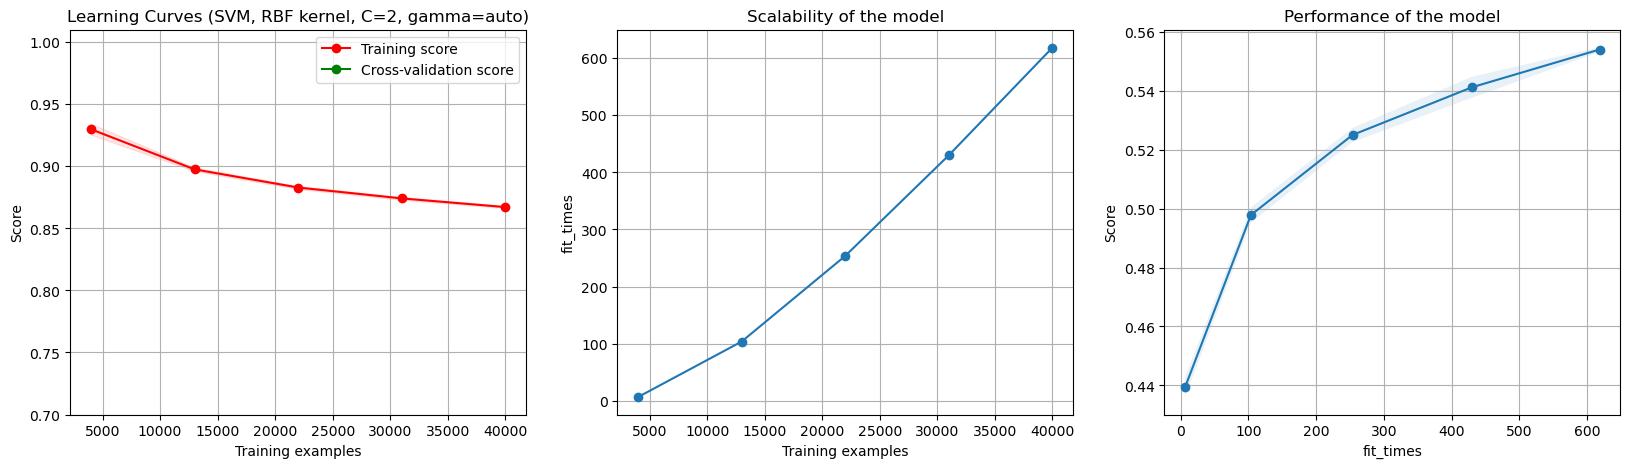

In [12]:
title = "Learning Curves (SVM, RBF kernel, C=2, gamma=auto)"

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

svm = SVC(kernel='rbf', gamma='auto', C=2, random_state=42)

plot_learning_curve(svm, title, train_pca, y_train, axes=None, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

# **9. Passing the output of the last hidden layer of the CNN to the SVM**

The idea is to pass the output of the last hidden layer of the Convolutional Neural Network (CNN) from the previous assignment to the SVM of this assignment to see if can get even better results than by using only the CNN.

The **CNN** gave us **81.61%** training accuracy and **70.48%** test accuracy, while the SVM gave us **86.304%** train accuracy and **56.36%** test accuracy.

By combining these two models we get **88.128%** training accuracy and **72.4%** test accuracy! Which means that we increase the test accuracy of the CNN by **2.7%**.

In [ ]:
from keras import layers, models
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN model
model = models.Sequential()

# Convolutional and pooling layers
# Adding a convolutional layer with 32 filters/kernels of 3x3 size each (each filter is a 3x3 grid)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# After applying a convolutional layer, MaxPooling2D is used with a 2x2 window,
# reducing the spatial dimensions by half.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# This defines the feature detector part of the model. This must be coupled with a classifier
# part of the model that interprets the features and makes a prediction as to which class a given image belongs.

# This can be fixed for each model that we investigate. First, the feature maps output from
# the feature extraction part of the model must be flattened. We can then interpret them with one
# or more fully connected layers, and then output a prediction. The output layer must have 10 nodes
# for the 10 classes and use the softmax activation function.

# Fully connected layers
model.add(layers.Flatten()) # flatten layer to convert the 3D output to 1D.
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# check model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.5049 - accuracy: 0.4523 - val_loss: 1.2160 - val_accuracy: 0.5649
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1379 - accuracy: 0.5981 - val_loss: 1.0676 - val_accuracy: 0.6238
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9899 - accuracy: 0.6523 - val_loss: 0.9582 - val_accuracy: 0.6642
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8958 - accuracy: 0.6863 - val_loss: 0.9212 - val_accuracy: 0.6807
Epoch 5/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8236 - accuracy: 0.7122 - val_loss: 0.9050 - val_accuracy: 0.6848
Epoch 6/10
1563/1563 [==============================] - 115s 74ms/step - loss: 0.7649 - accuracy: 0.7345 - val_loss: 0.8571 - val_accuracy: 0.7027
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7131 - accuracy: 0.7487 - val_loss: 0.8553 

In [ ]:
# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy :", train_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy :", test_acc)

1563/1563 [==============================] - 25s 16ms/step - loss: 0.5334 - accuracy: 0.8161
Train accuracy : 0.816100001335144
313/313 [==============================] - 4s 13ms/step - loss: 0.8868 - accuracy: 0.7048
Test accuracy : 0.704800009727478


In [ ]:
from keras.models import Model

# Get the input layer of the original model
input_layer = model.layers[0].input

# Get the output of the last hidden layer
last_hidden_layer_output = model.layers[-2].output

# Create a new model with the same input but outputting the last hidden layer
new_model = Model(inputs=input_layer, outputs=last_hidden_layer_output)

In [ ]:
features_train = new_model.predict(train_images)
print("Shape of features_train:", features_train.shape)

# Make sure the shapes match
assert features_train.shape[0] == len(train_labels)

1563/1563 [==============================] - 35s 22ms/step
Shape of features_train: (50000, 64)


In [ ]:
features_test = new_model.predict(test_images)
print("Shape of features_test:", features_test.shape)

# Make sure the shapes match
assert features_test.shape[0] == len(test_labels)

313/313 [==============================] - 4s 11ms/step
Shape of features_test: (10000, 64)


In [ ]:
print(features_train.shape)
print(type(features_train))

(50000, 64)
<class 'numpy.ndarray'>


In [ ]:
print(features_test.shape)
print(type(features_test))

(10000, 64)
<class 'numpy.ndarray'>


In [ ]:
# the best svm

svm = SVC(kernel='rbf', gamma='auto', C=2, random_state=42)

start = timer()

# pass the output of the last hidden layer of the cnn to the svm
svm.fit(features_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

end = timer()
print("Training time: ", end - start) # time in seconds

Training time:  104.00496774200019


In [ ]:
y_pred = svm.predict(features_train)
accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy)

Train accuracy: 0.88128


In [ ]:
y_pred = svm.predict(features_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.724


**CNN without SVM:**

Train accuracy : 0.8401600122451782

Test accuracy : 0.718999981880188

**CNN with SVM:**

Train accuracy : 0.88128

Test accuracy : 0.724

# Resources

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

https://stackoverflow.com/questions/59660939/default-value-of-gamma-svc-sklearn

https://www.csie.ntu.edu.tw/~cjlin/libsvm/#:~:text=LIBSVM%20is%20an%20integrated%20software,Fan%2C%20P.%2DH

https://scikit-learn.org/stable/modules/svm.html#kernel-functions

https://stackoverflow.com/questions/70397257/svm-svc-model-with-either-ovo-or-ovr-decision-functions-produces-the-exact

https://scikit-learn.org/stable/modules/svm.html


